# Import Library

In [281]:
import warnings
warnings.filterwarnings("ignore")

import math
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Load Data

In [282]:
data = pd.read_csv("../Dataset/heart.csv")
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
101,51,M,ASY,130,179,0,Normal,100,N,0.0,Up,0
169,58,M,NAP,140,179,0,Normal,160,N,0.0,Up,0
285,51,F,NAP,110,190,0,Normal,120,N,0.0,Up,0
764,41,F,NAP,112,268,0,LVH,172,Y,0.0,Up,0
107,34,M,ATA,150,214,0,ST,168,N,0.0,Up,0


# Inital Analysis

In [266]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [267]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Get Numerical and Categorical Columns

In [283]:
data = data.drop(columns=['Age', 'Sex'])

In [284]:
numerical_column = [column for column in data.columns if data[column].dtype != 'object']
print(numerical_column)
categorical_column = [column for column in data.columns if data[column].dtype == 'object']
print(categorical_column)

['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### Cleaning nan Value 

In [285]:
def set_numerical_nan(data, numerical_column):
    data[numerical_column] = data[numerical_column].fillna(data[numerical_column].mean())
    return data
data = set_numerical_nan(data, numerical_column)

In [286]:
def set_categorical_nan(data, categorical_column):
    imp = SimpleImputer(strategy="most_frequent")
    data[categorical_column] = imp.fit_transform(data[categorical_column])
    return data
data = set_categorical_nan(data, categorical_column)

# Data Exploration

### Distribution value for numerical columns

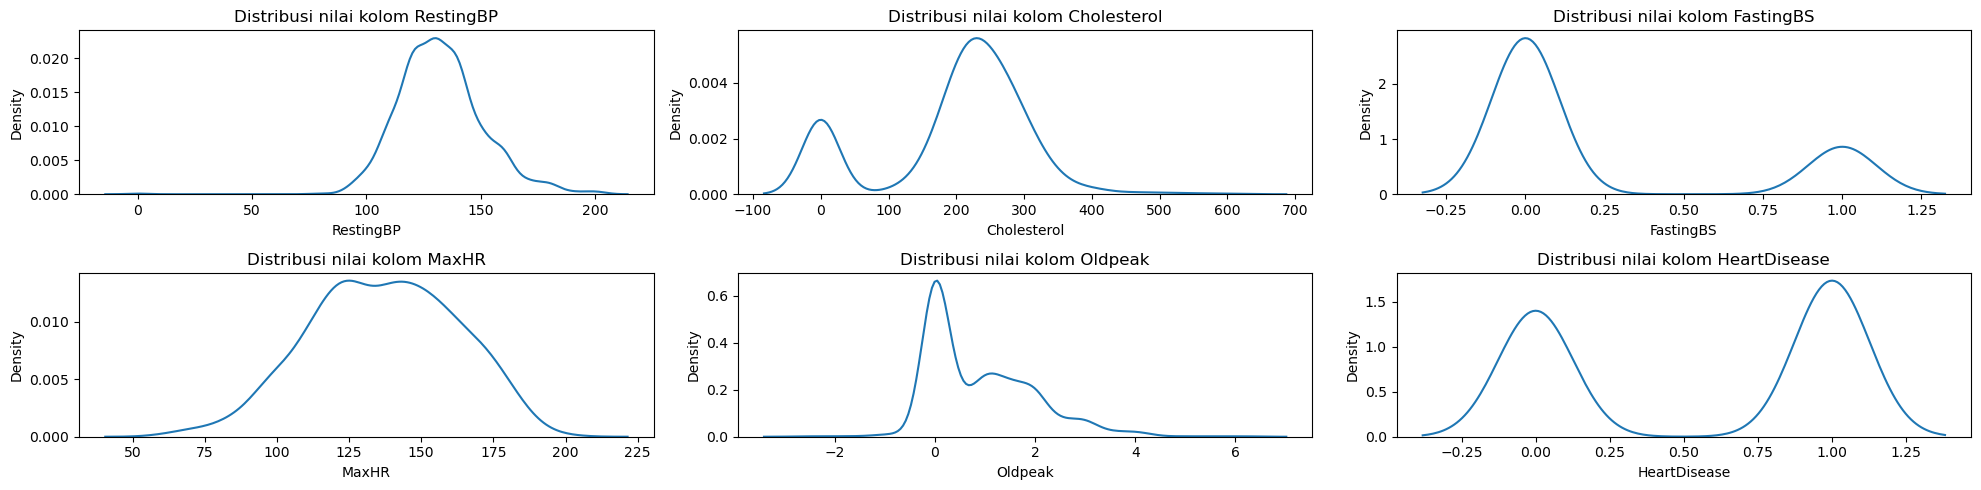

In [272]:
num_rows = 2
num_cols = math.ceil(len(numerical_column) / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(numerical_column):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data, x=column, ax=axes[row, col]).set_title("Distribusi nilai kolom " + column)
    
for i in range(len(numerical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Distribution value for numerical columns based on Gender

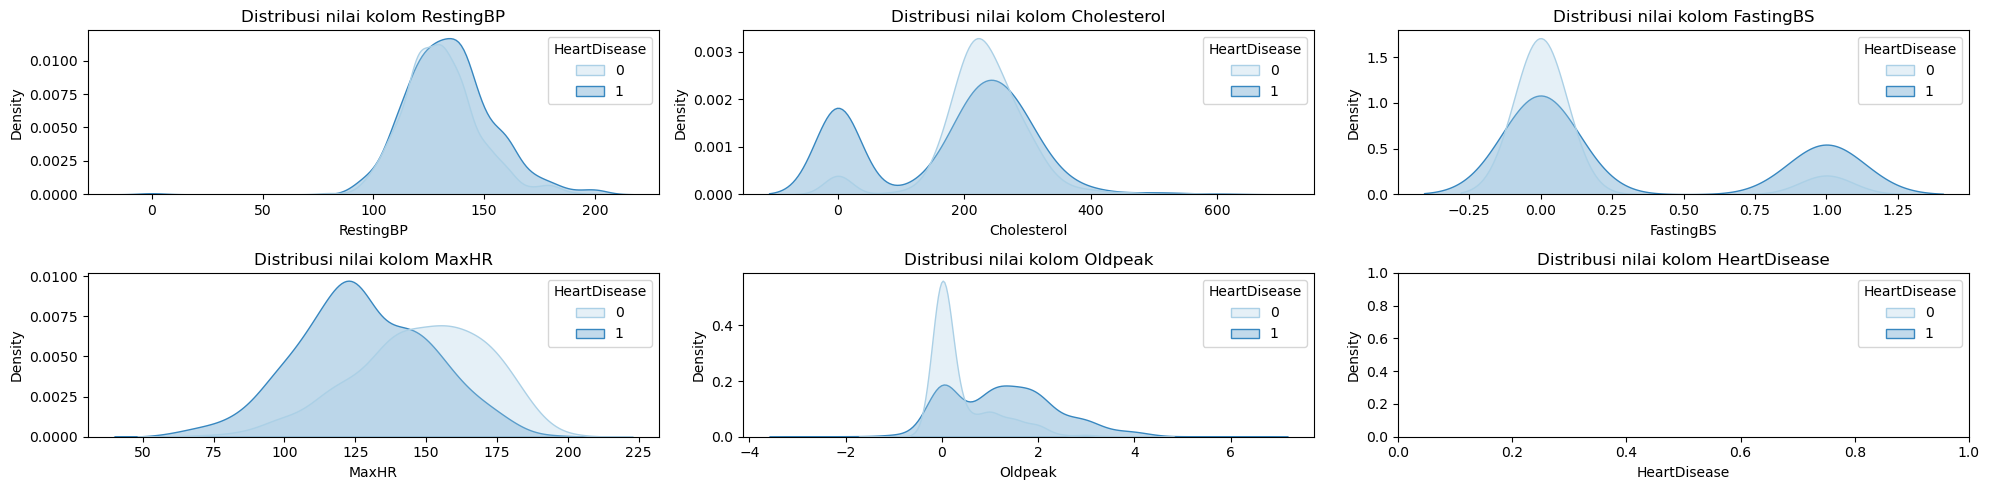

In [273]:
num_rows = 2
num_cols = math.ceil(len(numerical_column) / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(numerical_column):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data, x=column, hue="HeartDisease", fill=True, alpha=.3, palette="Blues", ax=axes[row, col]).set_title("Distribusi nilai kolom " + column)
    
for i in range(len(numerical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Count of each value for categorical columns

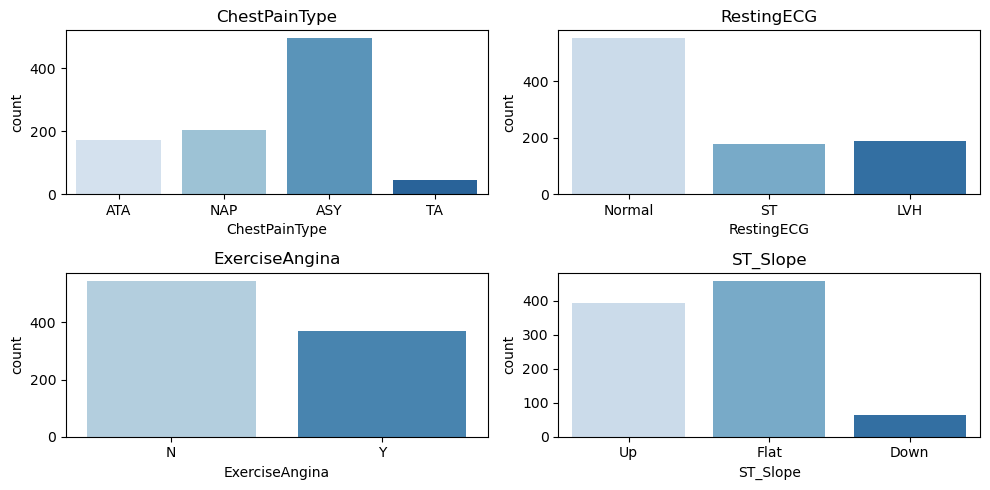

In [274]:
num_rows = 2
num_cols = math.ceil(len(categorical_column) / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
for i, column in enumerate(categorical_column):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=data[column], ax=axes[row, col], palette="Blues").set_title(column)
    
    
for i in range(len(categorical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### The range of values in the numerical column

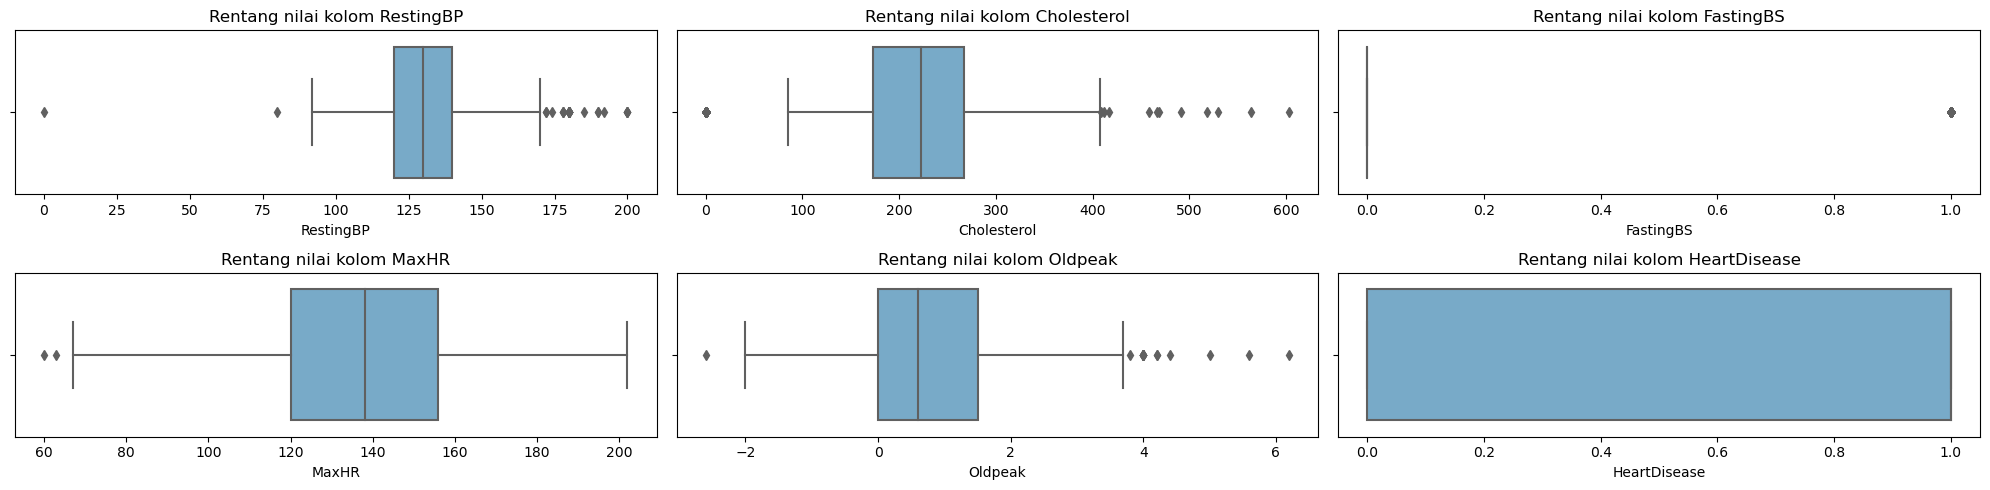

In [287]:
num_rows = 2
num_cols = math.ceil(len(numerical_column) / num_rows)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(numerical_column):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=data[column], ax=axes[row, col], palette="Blues").set_title("Rentang nilai kolom " + column)
    
for i in range(len(numerical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Remove Outlier from the data

In [253]:
# Q1   = data.quantile(0.25)
# Q3   = data.quantile(0.75)
# IQR  = Q3-Q1
# data = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)].dropna()
# data.shape

# Data correlation between columns

<Axes: >

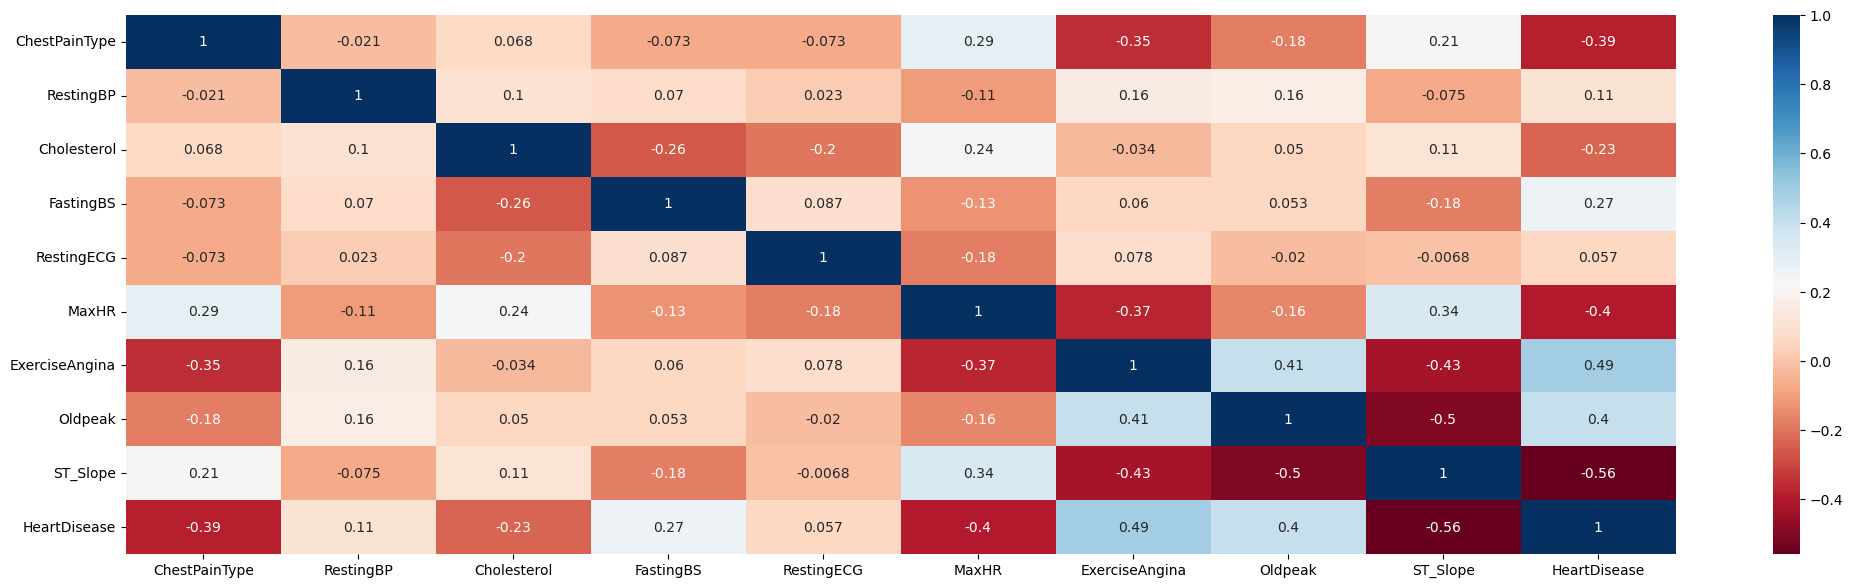

In [288]:
datacorr = data.copy()

encoder = LabelEncoder()
for column in categorical_column:
    datacorr[column] = encoder.fit_transform(datacorr[column])

plt.figure(figsize=(25,7))
corr = datacorr.corr()
sns.heatmap(corr, annot=True, cmap="RdBu")

# Data Preprocessing

In [289]:
data = pd.get_dummies(data, columns = categorical_column)

X = data.drop(columns=['HeartDisease'])
Y = data['HeartDisease'].astype('int8')

print(Counter(Y))
# oversample = SMOTE()
# X, Y = oversample.fit_resample(X, Y)

undersample = RandomUnderSampler()
X, Y = undersample.fit_resample(X, Y)
print(Counter(Y))

scaler = StandardScaler()
X = scaler.fit_transform(X)

Counter({1: 508, 0: 410})
Counter({0: 410, 1: 410})


### Split data to Train and Test data

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {(X_train.shape)}')
print(f'Total # of sample in test dataset: {(X_test.shape)}')

Total # of sample in whole dataset: 820
Total # of sample in train dataset: (656, 17)
Total # of sample in test dataset: (164, 17)


# Model Prediction

### Prepare Model

In [291]:
from xgboost import XGBClassifier

def regression_algorithms():
    algorithms = [
                  ('XGBoost', XGBClassifier()),
                  ('Linear Regression', LinearRegression()), 
                  ('SVR', SVR(kernel='rbf')), 
                  ('KNN', KNeighborsRegressor(n_neighbors=45)), 
                  ('Decision Tree', DecisionTreeRegressor(max_depth=3)),
                  ('Gradient Boosting', GradientBoostingRegressor(n_estimators=88, learning_rate=0.1, random_state=42)),
                  ('Random Forrest', RandomForestRegressor(n_estimators=30, max_depth=50, random_state=42)),
                  ('MLP', MLPRegressor(hidden_layer_sizes=(10000,), max_iter=100, random_state=42)),
                  ]
    return algorithms

def prepare_model(algorithm):
    model = algorithm
    model.fit(X_train, y_train)
    return model

def calculate_regression_performance(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = round(model.score(X_train,y_train), 4)*100
    mse = round(mean_squared_error(y_test, y_pred), 2)
    r2  = round(r2_score(y_test, y_pred), 2)
    return acc, mse, r2

def regression_result(result, name, acc, mse, r2):
    result.append((name, acc, mse, r2))
    return result

### Training and Evaluate the model

In [292]:
%%time
result = []
trained_models = []

algorithms = regression_algorithms()

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    trained_models.append((tup[0],model))

    # Calculate the Accuracy, Mean Squared Error (MSE), and R-squared score
    acc, mse, r2= calculate_regression_performance(model,X_train, y_train, X_test, y_test)
    result = regression_result(result, tup[0], acc, r2, mse)

regression_results_df = pd.DataFrame(result, columns=('Model Name', 'Accuracy', 'R-Square', 'MSE'))
regression_results_df

CPU times: total: 31.4 s
Wall time: 7.93 s


,Model Name,Accuracy,R-Square,MSE
0,XGBoost,100.00,0.37,0.16
1,Linear Regression,56.41,0.58,0.10
2,SVR,71.62,0.56,0.11
3,KNN,57.83,0.58,0.11
4,Decision Tree,57.12,0.56,0.11
5,Gradient Boosting,75.98,0.60,0.10
6,Random Forrest,93.23,0.54,0.12
7,MLP,86.95,0.49,0.13


### Find optimal hyperparameter for some models

In [202]:
%%time
max_value = 0
num_value = 0
n_number = 200

for i in tqdm(range(n_number)):
    # model = KNeighborsRegressor(n_neighbors=i+1)
    # model = DecisionTreeRegressor(max_depth=i+1)
    model = GradientBoostingRegressor(n_estimators=i+1, learning_rate=0.1, random_state=42)
    # model = RandomForestRegressor(n_estimators=i+1, max_depth=50, random_state=42)
    
    model.fit(X_train, y_train)
    # Calculate the R-squared score
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if (r2> max_value):
        max_value = r2
        num_value = i+1
    
print(max_value)
print(num_value)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:16<00:00, 12.11it/s]

0.6208143821525953
88
CPU times: total: 9.7 s
Wall time: 16.5 s
